In [2]:
%matplotlib inline
import ast
import json

import urllib
import urllib2
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import io
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
from cStringIO import StringIO
import numpy as np

import pylab as pl
from scipy.spatial.distance import pdist, squareform
import json
import os

In [3]:
SQL_SOURCE = 'https://fb55.carto.com/api/v2/sql'

def queryCartoDB(query, format='CSV', source=SQL_SOURCE):
    """ queries a url with an sql compatible search
    Arguments:
    query : the sql query string
    format : the expected format
    source " the url of the API
    """
    data = urllib.urlencode({'format': format, 'q': query})
    try:
        response = urllib2.urlopen(source, data)
    except urllib2.HTTPError, e:
        raise ValueError('\n'.join(ast.literal_eval(e.readline())['error']))
    except Exception:
        raise
    return StringIO(response.read())

In [4]:
facilityQuery = '''
SELECT zipcodes, count(*) FROM
(
SELECT * 
FROM nycasthmasdismissals  
) t 
GROUP BY t.zipcodes 
'''

In [5]:
# fill in the query details in facilityQuery: 
# within a single query collect AND GROUP the data by zipcode

facilityStream = queryCartoDB(facilityQuery, format='JSON', source=SQL_SOURCE)
facilityData   = json.loads(facilityStream.read())
facilityData
facilities     = pd.DataFrame.from_dict(facilityData['rows'])
facilities.head()

,count,zipcodes
0,1699,10461
1,405,11373
2,1698,10451
3,220,11691
4,246,11375


In [6]:
shapefile = 'ZIP_CODE_040114/ZIP_CODE_040114.shp'
zips = gpd.GeoDataFrame.from_file(shapefile)
zips['centroid'] = zips.geometry.centroid
zips

,AREA,BLDGZIP,COUNTY,CTY_FIPS,POPULATION,PO_NAME,SHAPE_AREA,SHAPE_LEN,STATE,ST_FIPS,URL,ZIPCODE,geometry,centroid
0,2.269930e+07,0,Queens,081,18681.0,Jamaica,0.0,0.0,NY,36,http://www.usps.com/,11436,"POLYGON ((1038098.251871482 188138.3800067157,...",POINT (1040696.262135346 185580.2219140405)
1,2.963100e+07,0,Kings,047,62426.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11213,"POLYGON ((1001613.712964058 186926.4395172149,...",POINT (1001912.871996466 183803.1131420481)
2,4.197210e+07,0,Kings,047,83866.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11212,"POLYGON ((1011174.275535807 183696.33770971, 1...",POINT (1008365.375095716 180768.9448568909)
3,2.369863e+07,0,Kings,047,56527.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11225,"POLYGON ((995908.3654508889 183617.6128015518,...",POINT (997023.1926918941 180870.3533200975)
4,3.686880e+07,0,Kings,047,72280.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11218,"POLYGON ((991997.1134308875 176307.4958601296,...",POINT (990785.2911208535 173656.048379133)
5,3.940860e+07,0,Kings,047,106132.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11226,"POLYGON ((994821.4729396403 177865.7178093046,...",POINT (996162.6751228294 174807.9970578609)
6,4.200274e+07,0,Kings,047,92561.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11219,"POLYGON ((987286.3515269756 173946.4621963799,...",POINT (985172.779324743 169813.4852984693)
7,4.788702e+07,0,Kings,047,67067.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11210,"POLYGON ((995796.0097044706 171110.0666224658,...",POINT (999084.3959355468 167909.6080879942)
8,4.992670e+07,0,Kings,047,80857.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11230,"POLYGON ((994099.2959063053 171240.7064530551,...",POINT (993775.081486132 165916.1064955659)
9,4.355518e+07,0,Kings,047,77354.0,Brooklyn,0.0,0.0,NY,36,http://www.usps.com/,11204,"POLYGON ((989500.1699339747 170730.1687602103,...",POINT (988452.3985091124 164795.0331785564)


In [122]:
zips1 = zips[['ZIPCODE','centroid']]
zips1.rename(columns = {'ZIPCODE' : 'zipcodes'}, inplace = True)
zips1.zipcodes = zips1.zipcodes.apply(int)

merged['x'] = merged.centroid.map(lambda p: p.x)
merged['y'] = merged.centroid.map(lambda p: p.y)

merged = merged.drop(['zipcodes','centroid'], axis = 1)

merged.head()

In [121]:
merged1 = merged.copy()
merged1['x'] = merged.centroid.apply(lambda:x.x)
merged1['y'] = merged.centroid..apply(lambda:y.y)



SyntaxError: invalid syntax (<ipython-input-121-7fabf39e17cd>, line 3)

In [127]:
merged1 = merged


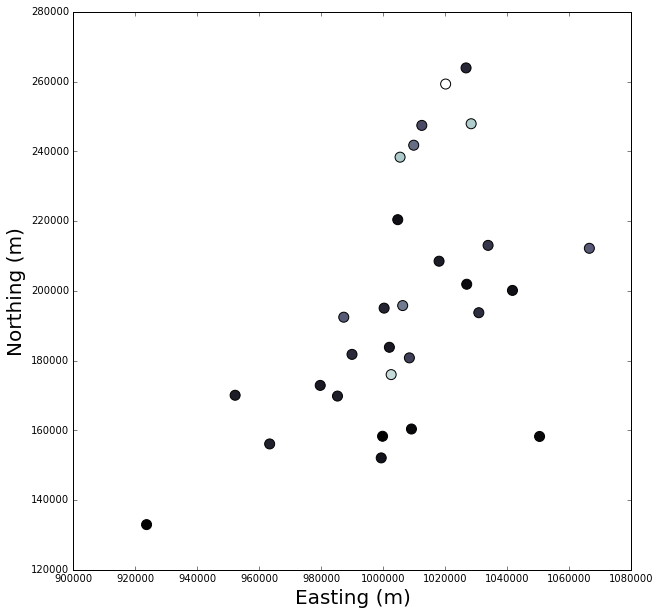

In [128]:
plt.figure(figsize=(10,10))
plt.scatter(merged1.x, merged1.y, c=merged1['count'], s=100, cmap='bone')
plt.xlabel("Easting (m)", fontsize=20)
plt.ylabel("Northing (m)", fontsize=20)


In [129]:
cols = merged1.columns.values
cols = np.append(cols[1:],cols[0])
x = np.array(merged1[cols])

In [130]:
def SVh_vctzd( P, h, bw ):
    '''
    Experimental semivariogram for a single lag
    bw max distance
    h lag
    P data
    '''
    pdsv = squareform( pdist( P[:,:2] ) )
    #print pdsv
    N = pdsv.shape[0]
    #print N
    #print np.triu_indices(N)
    Z = np.zeros((N,N))
    Z = Z - P[:,:2]
    #print Z
    Z = Z.T + P[:,:2]
    #print Z
    Z = Z**2
    #print Z
    Zcd =  Z[(pdsv >= h - bw) * (pdsv <= h + bw) * \
            (~np.identity(N, dtype=bool))]

    #print Zcd
    return np.sum( Zcd ) / ( 2.0 * len( Zcd ) )

def SVh( P, h, bw ):
    '''
    Experimental semivariogram for a single lag
    bw max distance
    h lag
    P data
    '''
    #distance matrix (eucledian)
    pdsv = squareform( pdist( P[:,:2] ) )
    #print pdsv
    N = pdsv.shape[0]
    #print N

    Z = list()
    for i in range(N):
        for j in range(i+1, N):
            #select only pair of points at the appropriate lag
            if( pdsv[i,j] >= h - bw )and( pdsv[i,j] <= h + bw ):
                Z.append( ( P[i,2] - P[j,2] )**2.0 )
    #print Z
    return np.sum( Z ) / ( 2.0 * len( Z ) )


def SV( P, hs, bw ):
    '''
    Experimental variogram for a collection of lags
    '''
    sv = list()
    for h in hs:
        #print h
        sv.append( SVh( P, h, bw ) )
        #sv.append( SVh_vctzd ( P, h, bw ) )
    sv = [ [ hs[i], sv[i] ] for i in range( len( hs ) ) if sv[i] > 0 ]
    return np.array( sv ).T

In [131]:
lag = 100
mysv = SV( x, np.arange(1, 10000, lag), 500 )
#print mysv
# lags in 500 meter increments from zero to 10,000
hs = np.arange(0, 10500, lag)
mysv = SV( x, hs, bw )
plot_x = np.arange(1, 10000, lag)

/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in double_scalars


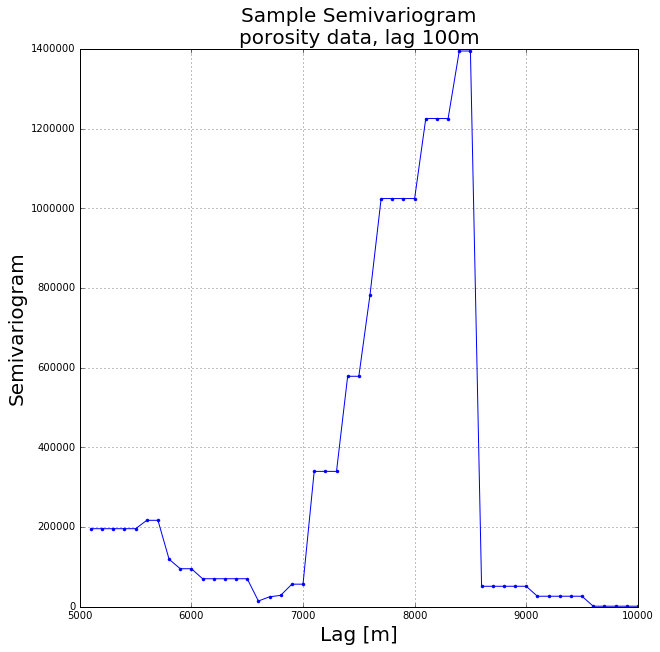

In [132]:
# plot the semivariogram
pl.figure(figsize=(10,10))
pl.plot(mysv[0], mysv[1], '.-' )
pl.xlabel('Lag [m]', fontsize=20)
pl.ylabel('Semivariogram', fontsize=20)
pl.title('Sample Semivariogram\nporosity data, lag %dm'%lag, fontsize=20) 
pl.grid()

In [133]:
# different variogram models
def opt( fct, x, y, C0, meshSize=1000 ):
    parameterRange = [ x[1], x[-1] ]
    mse = np.zeros( meshSize )
    a = np.linspace( parameterRange[0], parameterRange[1], meshSize )
    for i in range( meshSize ):
        mse[i] = np.mean( ( y - fct( x, a[i], C0 ) )**2.0 )
    return a[ mse.argmin() ]        


def spherical( h, a, C0 ):
    #print "sph"

    '''
    Spherical model of the semivariogram
    '''
    # if h is a single digit

    
    if type(h) == np.float64:
        # calculate the spherical function
        if h <= a:
            return C0*( 1.5*h/a - 0.5*(h/a)**3.0 )
        else:
            return C0
    # if h is an iterable
    else:
        # calcualte the spherical function for all elements
        a = np.ones( h.size ) * a
        C0 = np.ones( h.size ) * C0
        return map( spherical, h, a, C0 )

def exponentialngt(h, a, C0):
    #print "exp"
    '''
    Exponential model of the semivariogram
    '''
    # if h is a single digit
    if type(h) == np.float64:
        # calculate the spherical function
        return C0 - exp(-h/a)
    # if h is an iterable
    else:
        # calcualte the spherical function for all elements
        a = np.ones( h.size ) * a
        C0 = np.ones( h.size ) * C0
        return map( exponentialngt, h, a, C0 )

    
def gaussianngt(h, a, C0):
    #print "gaus"
    '''
    Gaussian model of the semivariogram
    '''
    # if h is a single digit
    if type(h) == np.float64:
        # calculate the spherical function
        return C0 - exp(-(h/a)**2)
    # if h is an iterable
    else:
        # calcualte the spherical function for all elements
        a = np.ones( h.size ) * a
        C0 = np.ones( h.size ) * C0
        return map( exponentialngt, h, a, C0 )



def C( P, h, bw ):
    '''
    Calculate the sill
    '''
    c0 = np.var( P[:,2] )
    if h == 0:
        return c0
    return c0 - SVh( P, h, bw )



def cvmodel( P, model, hs, bw ):
    '''
    Input:  (P)      ndarray, data
            (model)  modeling function
                      - spherical
                      - exponentialngt
                      - gaussian
            (hs)     distances
            (bw)     bandwidth
    Output: (covfct) function modeling the covariance
    '''
    # calculate the semivariogram
    sv = SV( P, hs, bw )
    # calculate the sill
    C0 = C( P, hs[0], bw )
    #print C0
    # calculate the optimal parameters
    param = opt( model, sv[0], sv[1], C0 )
    # return a covariance function
    covfct = lambda h, a = param: C0 - model( h, a, C0 )
    return covfct

/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in double_scalars


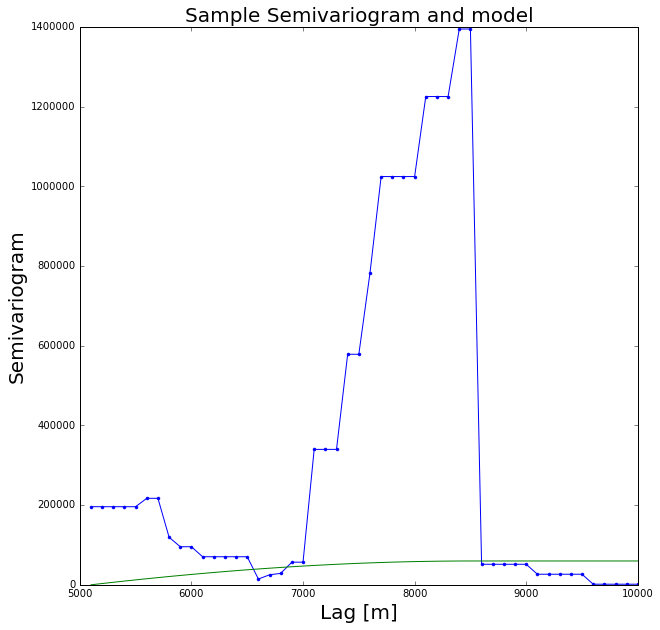

In [134]:

bw = 500
pl.figure(figsize=(10,10))
sp = cvmodel( x, model=spherical, 
             hs=np.arange(0,10000, 100 ), bw=bw)
#print sp(mysv[0])
sphere = sp(mysv[0])
pl.plot( mysv[0], mysv[1], '.-' )
pl.plot(mysv[0], -sphere+sphere.max())
pl.xlabel('Lag [m]', fontsize=20)
pl.ylabel('Semivariogram', fontsize=20)
pl.title('Sample Semivariogram and model', fontsize=20) ;

In [101]:
def krige( P, model, hs, bw, u, N ):
    '''
    Input  (P)     ndarray, data
           (model) modeling function
                    - spherical
                    - exponential
                    - gaussian
           (hs)    kriging distances
           (bw)    kriging bandwidth
           (u)     unsampled point
           (N)     number of neighboring
                   points to consider
    '''
    # covariance function
    covfct = cvmodel( P, model, hs, bw )
    # mean of the variable
    mu = np.mean( P[:,2] )
 
    # distance between u and each data point in P
    d = np.sqrt( ( P[:,0]-u[0] )**2.0 + ( P[:,1]-u[1] )**2.0 )
    # add these distances to P
    P = np.vstack(( P.T, d )).T
    # sort P by these distances
    # take the first N of them
    P = P[d.argsort()[:N]]
 
    # apply the covariance model to the distances
    k = covfct( P[:,3] )
    # cast as a matrix
    k = np.matrix( k ).T
 
    # form a matrix of distances between existing data points
    K = squareform( pdist( P[:,:2] ) )
    # apply the covariance model to these distances
    K = covfct( K.ravel() )
    # re-cast as a NumPy array -- thanks M.L.
    K = np.array( K )
    # reshape into an array
    K = K.reshape(N,N)
    # cast as a matrix
    K = np.matrix( K )
 
    # calculate the kriging weights
    weights = np.linalg.inv( K ) * k
    weights = np.array( weights )
 
    # calculate the residuals
    residuals = P[:,2] - mu
 
    # calculate the estimation
    estimation = np.dot( weights.T, residuals ) + mu
 
    return float( estimation )

In [115]:
import time
print time.localtime()

x0, x1 = x[:,0].min(), x[:,0].max()
y0, y1 = x[:,1].min(), x[:,1].max()
z = np.zeros((8,10))
dx, dy = (x1-x0)/z.shape[1], (y1-y0)/z.shape[0]

for i in range(z.shape[0]):
    print i
    for j in range(z.shape[1]):
        z[i][j] = krige(x, spherical, hs, bw, (dy*j,dx*i), 3)
        #print(z[i][j])
print time.localtime()

time.struct_time(tm_year=2016, tm_mon=12, tm_mday=14, tm_hour=11, tm_min=57, tm_sec=1, tm_wday=2, tm_yday=349, tm_isdst=0)
0


/Users/macbook/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in double_scalars


1
2
3
4
5
6
7
time.struct_time(tm_year=2016, tm_mon=12, tm_mday=14, tm_hour=11, tm_min=57, tm_sec=14, tm_wday=2, tm_yday=349, tm_isdst=0)


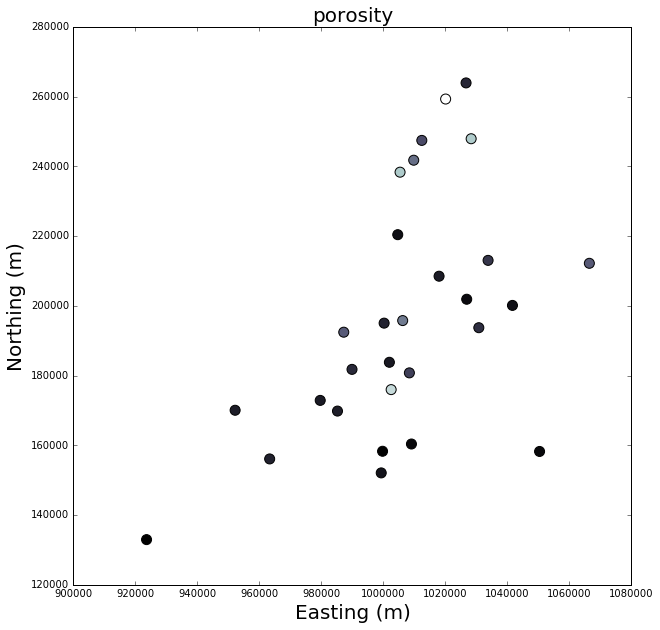

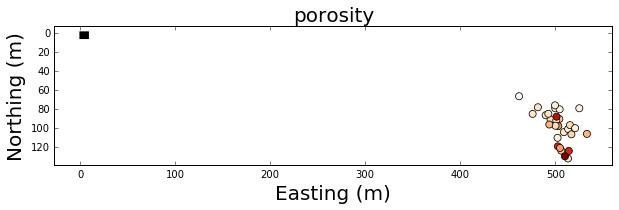

In [106]:
ax = pl.figure(figsize=(10,10), dpi=150).add_subplot(111)
ax.scatter(x[:,0], x[:,1], c=x[:,2], s=100, cmap='bone')
#ax.set_ylim(0, 17000)
#ax.set_xlim(0, 21000)
ax.set_xlabel("Easting (m)", fontsize=20)
ax.set_ylabel("Northing (m)", fontsize=20)
title = pl.title("porosity", fontsize=20)

ax = pl.figure(figsize=(10,10), dpi=150).add_subplot(111)
H = np.zeros_like(z)
for i in range( z.shape[0] ):
    for j in range( z.shape[1] ):
        H[i,j] = np.round( z[i,j]*3 )
ax.imshow( z, cmap='bone', interpolation='nearest' )
ax.scatter( x[:,0] / 2000.0, x[:,1] / 2000.0, c=x[:,2], cmap='OrRd', 
           linewidths=0.75, s=50 )

#xlim(0,99) ; ylim(0,89)
#ax.axis('off')
ax.set_xlabel("Easting (m)", fontsize=20)
ax.set_ylabel("Northing (m)", fontsize=20)
ax.set_title("porosity", fontsize=20)
#ax.xticks( [2,5.0,7], [5000,10000,15000] )
#ax.yticks( [2,5.0,7], [5000,10000,15000] )